In [1]:
import numpy as np
from astropy.constants import c, G, M_sun, R_earth, au, e, m_e, h, eps0, Ryd, N_A
from astropy import units as u

import matplotlib.pyplot as plt

%matplotlib inline

# OSP Astronomi 2019

### Nomor 2

$c = \lambda \cdot f$

Cara 1

In [2]:
lambda_1 = (6678 - 1.25) * 10**(-10) * u.meter
lambda_2 = (6678 + 1.25) * 10**(-10) * u.meter

In [3]:
lambda_1

<Quantity 6.67675e-07 m>

In [4]:
lambda_2

<Quantity 6.67925e-07 m>

In [5]:
f_1 = c / lambda_1
f_2 = c / lambda_2

In [6]:
f_1

<Quantity 4.4900956e+14 1 / s>

In [7]:
f_2

<Quantity 4.48841499e+14 1 / s>

In [8]:
f_1 - f_2

<Quantity 1.68061369e+11 1 / s>

Cara 2

$f = c \cdot \lambda^{-1}$

Untuk $df$ atau $d\lambda$ kecil

$\frac{df}{d\lambda} = - c \cdot \lambda^{-2}$

$df = - c \cdot \lambda^{-2} d\lambda$

In [9]:
lamb = 6678e-10*u.meter
dlamb = 2.5e-10*u.meter

In [10]:
df = -c * lamb**(-2) * dlamb

In [11]:
df

<Quantity -1.68061363e+11 1 / s>

Cara yang SALAH -> Jebakan

In [12]:
c/dlamb

<Quantity 1.19916983e+18 1 / s>

### Nomor 3

In [13]:
Mv = 2.6
B0_V0 = 0.3
V = 6.79
B_V = 0.35

R = 3.2

$V - M_\text{v} = -5 + 5 \log{d} + A_\text{v}$

In [14]:
E_BV = B_V - B0_V0

In [15]:
Av = R * E_BV

In [16]:
d = 10**((V - Mv - Av + 5.0)/5.0)

In [17]:
print(f"Jaraknya: {d} pc")

Jaraknya: 63.97348354826479 pc


### Nomor 4

In [18]:
M = 1.4*M_sun
rho = 1e12*u.kg/u.m**3
Rf = 10000*u.m

In [19]:
Vi = M/rho

In [20]:
Vi

<Quantity 2.78386558e+18 m3>

In [21]:
Ri = (3*Vi/(4*np.pi))**(1/3.)

In [22]:
Ri

<Quantity 872676.3719462 m>

In [23]:
3./5. * G * M * M * (1./Rf - 1./Ri)

<Quantity 3.06784821e+46 kg m2 / s2>

### Nomor 7

In [24]:
from datetime import datetime
from astropy.time import Time, TimeDelta

In [25]:
t1 = Time("2019-03-20 21:58") # vernal_equinox
t2 = Time("2019-09-23 07:50") # autumnal_equinox
t3 = Time("2020-03-20 03:49") # next vernal equinox

In [26]:
t2-t1

<TimeDelta object: scale='tai' format='jd' value=186.4111111111111>

In [27]:
t3-t2

<TimeDelta object: scale='tai' format='jd' value=178.83263888888888>

In [28]:
(t2-t1) - (t3-t2)

<TimeDelta object: scale='tai' format='jd' value=7.5784722222222225>

### Nomor 9

**Kasus Bumi**

In [29]:
he = 8800 * u.meter

In [30]:
theta_earth = np.arccos(R_earth/(R_earth+he))

In [31]:
theta_earth.to_value(u.degree)

3.0080412370253837

In [32]:
# Jarak horizon melengkung di permukaan
theta_earth*R_earth

<Quantity 334851.67628256 m rad>

In [33]:
# Jarak lurus dari pengamat ke horizon
np.sin(theta_earth)*(R_earth+he)

<Quantity 335159.66344415 m>

In [34]:
np.sqrt(2*R_earth*he + he**2)

<Quantity 335159.66344416 m>

**Kasus Mars**

In [35]:
Rm = 3389500 # meter
hm = 13800 # meter

In [36]:
theta_mars = np.arccos(Rm/(Rm+hm))

In [37]:
(theta_mars*u.rad).to_value(u.degree)

5.161476057005604

In [38]:
# Jarak horizon melengkung di permukaan
theta_mars*Rm

305342.26506554306

In [39]:
# Jarak lurus dari pengamat ke horizon
np.sin(theta_mars)*(Rm+hm)

306170.9326503739

In [40]:
np.sqrt(2*Rm*hm + hm**2)

306170.93265037425

### Nomor 10

In [41]:
v = 220.0 # km/s
R = 8000 # pc
Gmodified = 4.302e-3 #

In [42]:
M = v**2 * R  / Gmodified

In [43]:
print(f"Massa galaksi hingga radius 8kpc adalah {M} Msun")

Massa galaksi hingga radius 8kpc adalah 90004649000.46489 Msun


In [44]:
rho_dm = (1.0 - 0.529) * M / (4./3. * np.pi * R**3)

In [45]:
rho_dm

0.019766386335752718

### Nomor 11

In [46]:
n = 300 / u.cm**3
mH2 = 2 * 1.6735e-24 * u.gram
rho = mH2 * n
R = (10. * u.pc).to(u.cm)

print('G: ', G, G.cgs, "\nmass of H2: ", mH2, "\ndensity: ", rho, "\nradius: ", R)

G:    Name   = Gravitational constant
  Value  = 6.67408e-11
  Uncertainty  = 3.1e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2014 6.674079999999999e-08 cm3 / (g s2) 
mass of H2:  3.347e-24 g 
density:  1.0041e-21 g / cm3 
radius:  3.0856775814671913e+19 cm


In [47]:
np.sqrt(32*G.cgs/5.) * np.pi * rho * R

<Quantity 6.36155192e-05 g(1/2) / (cm(1/2) s)>

In [48]:
rho.to(u.kg/u.m**3)

<Quantity 1.0041e-18 kg / m3>

In [49]:
R.to(u.meter)

<Quantity 3.08567758e+17 m>

In [50]:
np.sqrt(32.*G*1e-7/5.) * np.pi * rho.to(u.kg/u.m**3) * R.to(u.meter)

<Quantity 6.36155192e-09 kg(1/2) / (m(1/2) s)>

### Nomor 12

In [51]:
D = 278205221 * u.m
d = 10.627 * au

In [52]:
theta = D/d
theta_deg = theta*180/np.pi
theta_arcmin = theta_deg * 60.
theta_arcsec = theta_deg * 3600.

In [53]:
print(f"Diameter sudut: {theta} radian \n= {theta_deg} deg \n= {theta_arcmin} arcmin \n= {theta_arcsec} arcsec")

Diameter sudut: 0.000174996427744843 radian 
= 0.010026556739645566 deg 
= 0.601593404378734 arcmin 
= 36.09560426272404 arcsec


In [54]:
fov = 744./75. * theta_deg
print(fov, fov*60, fov*3600)

0.09946344285728402 5.967806571437041 358.0683942862225


In [55]:
fov*60., fov*3600.

(<Quantity 5.96780657>, <Quantity 358.06839429>)

In [56]:
fov/55*2794

<Quantity 5.0527429>

### Nomor 13

Coba satu2 saja!

In [57]:
def is_kabisat_modified_gregorian(year):
    kabisat = False
    
    if year % 4 == 0:
        kabisat = True
        
    if year % 100 == 0:
        if year % 400 == 0:
            kabisat = True
        else:
            kabisat = False
            
    if year % 4000 == 0:
        kabisat = False
    
    return kabisat

def is_kabisat_ortodoks_timur(year):
    kabisat = False
    
    if year % 4 == 0:
        kabisat = True
        
    if year % 100 == 0:
        if (year % 900 == 200) or (year % 900 == 600):
            kabisat = True
        else:
            kabisat = False
    
    return kabisat

In [58]:
print("Test Modified Gregorian")
print('2002: ', is_kabisat_modified_gregorian(2002))
print('2004: ', is_kabisat_modified_gregorian(2004))
print('1900: ', is_kabisat_modified_gregorian(1900))
print('8000: ', is_kabisat_modified_gregorian(8000))
print('2000: ', is_kabisat_modified_gregorian(2000))

print("\nTest Ortodoks Timur")
print('2002: ', is_kabisat_ortodoks_timur(2002))
print('2004: ', is_kabisat_ortodoks_timur(2004))
print('1900: ', is_kabisat_ortodoks_timur(1900))
print('2400: ', is_kabisat_ortodoks_timur(2400))
print('2000: ', is_kabisat_ortodoks_timur(2000))

Test Modified Gregorian
2002:  False
2004:  True
1900:  False
8000:  False
2000:  True

Test Ortodoks Timur
2002:  False
2004:  True
1900:  False
2400:  True
2000:  True


In [59]:
year = 2100
x = is_kabisat_modified_gregorian(year)
y = is_kabisat_ortodoks_timur(year)
print(year, x, y)
while (x and y) is not True:
    year += 100
    x = is_kabisat_modified_gregorian(year)
    y = is_kabisat_ortodoks_timur(year)
    print(year, x, y)

2100 False False
2200 False False
2300 False False
2400 True True


In [60]:
year = 2000
x = is_kabisat_modified_gregorian(year)
y = is_kabisat_ortodoks_timur(year)
print(year, x, y)
while x == y:
    year += 100
    x = is_kabisat_modified_gregorian(year)
    y = is_kabisat_ortodoks_timur(year)
    print(year, x, y)

2000 True True
2100 False False
2200 False False
2300 False False
2400 True True
2500 False False
2600 False False
2700 False False
2800 True False


lol.. ngapain bikin fungsi, nyobain satu2 lebih cepet.

### Nomor 14

In [61]:
-2.5*np.log10(6./5.)

-0.19795311511906205

In [62]:
-2.5*np.log10(4./5.)

0.242275032520141

In [63]:
(0.242275032520141+0.19795311511906205)/2

0.22011407381960152

#### Error propagation from flux to magnitude

$$ f \pm \sigma_f \longrightarrow m \pm \sigma_m$$

Assume that the errors on the magnitudes are small. The magnitude equation is 

$$m = -2.5 \log_{10} f + c$$

Therefore, from standard error propagation formula

$$\sigma_m = \frac{\partial m}{\partial f} \sigma_f = \frac{dm}{df} \sigma_f$$

To differentiate $\log_{10} f$, we use the change of base formula to write:

$$ \log_{10} f = \frac{ \ln f }{\ln 10}$$

Hence,

$$m = -\frac{2.5}{\ln{10}} \ln f + c$$ 

$$\frac{dm}{df} \approx -\frac{2.5}{\ln{10}} \frac{1}{f} = -1.086\frac{\sigma_f}{f}$$

$$ | \sigma_m | = 1.086 \frac{ \sigma_f }{ f} \approx \frac{ \sigma_f }{ f}$$

In [64]:
np.log(10)

2.302585092994046

In [65]:
const = (-2.5/np.log(10))
print(const)

-1.0857362047581294


In [66]:
abs(const)*(1./5.)

0.21714724095162588

### Nomor 15

In [67]:
A = 0.25 * np.pi * 60**2
print(A)

2827.4333882308138


In [68]:
m = 20.5 - 2.5 * np.log10(np.pi * 1 * 1)
print(m)

19.257125318264666


In [69]:
F = 1.6e5 * 10**((19.26 + 26.78)/(-2.5))
print(F)

6.139315927876405e-14


In [70]:
h.cgs

<Quantity 6.62607004e-27 erg s>

In [71]:
c.cgs

<Quantity 2.99792458e+10 cm / s>

In [72]:
0.95 * (F*u.erg/(u.cm**2 * u.s)) * (A*u.cm**2) * (5.5e-5*u.cm) / (h.cgs * c.cgs)

<Quantity 45.65853099 1 / s>

### Nomor 16

In [73]:
k_e = 1./(4*np.pi*eps0)

In [74]:
k_e ### 9 x 10^9

<Quantity 8.98755179e+09 m / F>

In [75]:
h

<<class 'astropy.constants.codata2014.CODATA2014'> name='Planck constant' value=6.62607004e-34 uncertainty=8.1e-42 unit='J s' reference='CODATA 2014'>

In [76]:
# radius
r = h.to_value()**2 / (4 * np.pi**2 * m_e.to_value() * e.to_value()**2 * k_e.to_value()) 
#!entah kenapa error gara2 satuan

In [77]:
print(f"Radius untuk n=1: {r} meter")

Radius untuk n=1: 5.2917721052676276e-11 meter


In [78]:
# energy
E = -(2 * np.pi**2 * m_e.to_value() * e.to_value()**4 * k_e.to_value()**2) / h.to_value()**2 

In [79]:
print(f"Energi untuk n=1 adalah {E} Joule = {E/e.to_value()} eV")

Energi untuk n=1 adalah -2.1798723256957297e-18 Joule = -13.605693014090258 eV


In [80]:
# cari lambda
# konstanta Rydberg
(E*u.Joule)/(h*c)

<Quantity -10973731.57208866 1 / m>

In [81]:
print(f"Sebagai pembanding, konstanta Rydberg di daftar konstanta: {Ryd}")

Sebagai pembanding, konstanta Rydberg di daftar konstanta: 10973731.568508 1 / m


In [82]:
1./Ryd

<Quantity 9.11267051e-08 m>

In [83]:
1. / (10973732 * (1./1 - 1./4))

1.215022686296087e-07

### Nomor 17


In [84]:
# Cara 1
d = np.log(0.5)/np.log(0.99) * 100
print(d)

6896.756393652842


In [85]:
## Cara 2
konst = -np.log(0.99)/100.
print(konst)

d = -np.log(0.5)/konst
d_in_m = (d*u.pc).to(u.m)

print(f"d = {d} pc = {d_in_m}")

0.0001005033585350145
d = 6896.756393652843 pc = 2.1281166588735095e+20 m


In [86]:
tau = konst * 1000.0

In [87]:
print(tau)

0.1005033585350145


### Nomor 18

#### b.)

Jarak dari kita (NGC 7320 dan NGC 7320C)

In [88]:
v1 = 786 * u.km/u.s
v2 = 5985 * u.km/u.s
H0 = 69.3 * u.km/u.s/u.Mpc

In [89]:
z1 = v1/c.to(u.km/u.s)
z2 = v2/c.to(u.km/u.s)
print(z1, z2)
print("Small enough, ignore acceleration of universe!")

0.002621813788257475 0.0199638110976094
Small enough, ignore acceleration of universe!


In [90]:
d1 = v1/H0
d2 = v2/H0
print(d1, d2, d2/d1)

11.341991341991342 Mpc 86.36363636363637 Mpc 7.614503816793894


Cari skala

In [91]:
from astropy.coordinates import SkyCoord

In [92]:
jsudut = 355 # pixel
coord1 = SkyCoord("22h36m3.5s 33d58m33s", unit=(u.hour, u.degree)) # NGC 7319
coord2 = SkyCoord("22h36m20.4s 33d59m6s", unit=(u.hour, u.degree)) # NGC 7320C

In [93]:
coord1, coord2

(<SkyCoord (ICRS): (ra, dec) in deg
     (339.01458333, 33.97583333)>, <SkyCoord (ICRS): (ra, dec) in deg
     (339.085, 33.985)>)

In [94]:
dist = coord1.separation(coord2)

In [95]:
dist

<Angle 0.05910666 deg>

In [96]:
dist.to(u.arcsec)

<Angle 212.7839669 arcsec>

In [97]:
212.784/355

0.5993915492957747

In [98]:
196/64.

3.0625

In [99]:
196*0.6, 64*0.6

(117.6, 38.4)

In [100]:
(117.6/206265*d1).to(u.kpc), (38.4/206265*d2).to(u.kpc)

(<Quantity 6.46652695 kpc>, <Quantity 16.07816952 kpc>)

#### c.)

In [101]:
## mencari jarak rata-rata dari pusat cluster
def spherical_to_cartesian(r, theta, phi):
    """
    phi is azimuthal angle 0 to 360 deg
    theta is colatitude angle from +z direction, 0 to 180 deg
    """
    x = r*np.sin(theta)*np.cos(phi)
    y = r*np.sin(theta)*np.sin(phi)
    z = r*np.cos(theta)
    
    return x, y, z

In [102]:
co = SkyCoord(ra=['22h35m51.9s', '22h35m56.7s', '22h35m58.4s', '22h36m3.5s', '22h36m20.4s'], 
              dec=['33d56m42s', '33d57m56s', '33d57m57s', '33d58m33s', '33d59m6s'], 
              unit=(u.hour, u.degree))

In [103]:
phi = co.ra.value
theta = (90*u.degree - co.dec).value
print(phi, theta)

[338.96625    338.98625    338.99333333 339.01458333 339.085     ] [56.055      56.03444444 56.03416667 56.02416667 56.015     ]


In [104]:
v_radial = np.array([6599., 6630., 5774., 6747., 5985.])
d = v_radial*(u.km/u.s) /H0
print(d, "in Mpc")

[95.22366522 95.67099567 83.31890332 97.35930736 86.36363636] Mpc in Mpc


In [105]:
cart = spherical_to_cartesian(d, theta, phi)

In [106]:
cart

(<Quantity [-42.74953414, -44.87410715, -39.18606216, -46.89150709,
            -42.99476777] Mpc>,
 <Quantity [14.44038468, 14.16473632, 12.06472804, 13.35313387,  9.02954737] Mpc>,
 <Quantity [83.85403413, 83.29834431, 72.53229984, 84.27167441, 74.35452175] Mpc>)

In [107]:
from mpl_toolkits.mplot3d import Axes3D

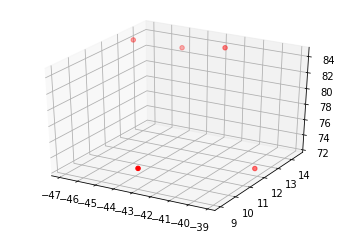

In [108]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(cart[0].value, cart[1].value, cart[2].value, c='r', marker='o')

In [109]:
# asumsi massa galaksi sama semua
center_of_mass_x = np.mean(cart[0].value)
center_of_mass_y = np.mean(cart[1].value)
center_of_mass_z = np.mean(cart[2].value)

print(center_of_mass_x, center_of_mass_y, center_of_mass_z)

# distance to the center of mass
dist = np.sqrt((cart[0].value - center_of_mass_x)**2 + 
               (cart[1].value - center_of_mass_y)**2 + 
               (cart[2].value - center_of_mass_z)**2)
print(dist) # Mpc

print(np.mean(dist))

-43.33919566332649 12.610506056071793 79.66217488768618
[4.61170688 4.24185255 8.26931132 5.86667695 6.41194803]
5.880299147250374


In [110]:
mean_vr = np.mean(v_radial)
print(mean_vr)

6347.0


In [111]:
# Asumsi jaraknya ke kita sama
d = mean_vr * (u.km/u.s) /H0
print(d)

cart = spherical_to_cartesian(d, theta, phi)

# asumsi massa galaksi sama semua
center_of_mass_x = np.mean(cart[0].value)
center_of_mass_y = np.mean(cart[1].value)
center_of_mass_z = np.mean(cart[2].value)

# average distance to the center of mass
dist = np.sqrt((cart[0].value - center_of_mass_x)**2 + 
               (cart[1].value - center_of_mass_y)**2 + 
               (cart[2].value - center_of_mass_z)**2)
print(dist) # Mpc

print(np.mean(dist)) # jarak rata-rata tangensial

91.5873015873016 Mpc
[2.79745831 1.07700995 0.75745061 0.8296269  3.81404977]
1.8551191073539914


In [112]:
# jarak rata-ratanya 
np.sqrt(2 * 1.855**2)

2.6233661582020913

In [113]:
# Variansi kecepatan
var_vr = np.var(v_radial)
print(var_vr)

152593.2


In [114]:
# ngeCek ajah
print(np.mean((v_radial*1000 - mean_vr*1000)**2))
print(np.std(v_radial))
print(np.sqrt(var_vr))

152593200000.0
390.6317959408835
390.6317959408835


In [115]:
## Pakai cara 2
mass = 5 * var_vr*10**6 *(u.m*u.m/u.s/u.s) * (5.88*u.Mpc).to(u.m) / G
print(mass)
mass / M_sun

2.074157103291477e+45 kg


<Quantity 1.04308914e+15>

In [116]:
## Pakai cara 1
mass = 5 * var_vr*10**6 *(u.m*u.m/u.s/u.s) * (2.62*u.Mpc).to(u.m) / G
print(mass)
mass / M_sun

9.241992535074267e+44 kg


<Quantity 4.64777812e+14>

### Nomor 19

In [117]:
# lamb0 = 6564.5377 # H alpha

In [118]:
t = np.array([0.061, 0.334, 1.019, 1.152, 1.338, 1.886, 2.038, 2.148, 2.821, 2.859, 3.145, 3.559, 3.654, 3.677])

lamb1 = np.array([6546.232896257508, 6547.090794298514, 6547.878600881761,6547.494435487322, 6547.113801418237, 
         6546.699700320347, 6546.798594605766, 6545.867624263718, 6544.786607419655, 6544.885501705074,
         6545.20123462353, 6545.706258730231, 6546.001216599829, 6545.80601991619])

lamb2 = np.array([6545.952209396892, 6545.094418365745, 6544.56974902621, 6544.532509595217, 6544.836738624852, 
         6546.355275395267, 6547.081946884365, 6547.322827322518, 6547.978815748683, 6547.871861113982,
         6547.95629252467, 6547.216735006534, 6547.097643401073, 6546.835263371333])
         


lamb0 = (6546.232896257508 + 6545.952209396892)/2 ## sebenarnya salah!!

dlamb1 = lamb1 - lamb0
dlamb2 = lamb2 - lamb0

print(dlamb1, dlamb2)

vrad1 = dlamb1/lamb0 * c.to(u.km/u.s).value
vrad2 = dlamb2/lamb0 * c.to(u.km/u.s).value

print(vrad1, vrad2)

[ 0.14034343  0.99824147  1.78604805  1.40188266  1.02124859  0.60714749
  0.70604178 -0.22492856 -1.30594541 -1.20705112 -0.8913182  -0.3862941
 -0.09133623 -0.28653291] [-0.14034343 -0.99813446 -1.5228038  -1.56004323 -1.2558142   0.26272257
  0.98939406  1.2302745   1.88626292  1.77930829  1.8637397   1.12418218
  1.00509057  0.74271054]
[  6.42733075  45.7166259   81.79593125  64.20224662  46.77028668
  27.80563181  32.33470938 -10.30108975 -59.80859277 -55.27951521
 -40.81984374 -17.69117316  -4.18293996 -13.12239401] [ -6.42733075 -45.71172516 -69.74009164 -71.44555188 -57.51272587
  12.03194789  45.31143945  56.34307978  86.38548769  81.48726901
  85.35398797  51.48435285  46.03029536  34.01403476]


In [119]:
# for i,ti in enumerate(t):
#     print(ti, ' & ', "{0:.3f}".format(round(dlamb1[i],3)), ' & ', "{0:.3f}".format(round(dlamb2[i],3)), 
#           ' & ', "{0:.3f}".format(round(vrad1[i],3)), ' & ', "{0:.3f}".format(round(vrad2[i],3)), ' \\\\')

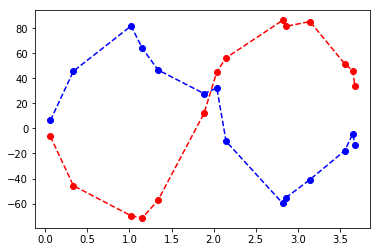

In [120]:
plt.plot(t, vrad1, 'bo--')
plt.plot(t, vrad2, 'ro--')

agak jelek, tapi masih bisa dikira-kira fungsi sinusoidalnya, haha

In [121]:
vrad = np.concatenate([vrad1, vrad2])
vrad

array([  6.42733075,  45.7166259 ,  81.79593125,  64.20224662,
        46.77028668,  27.80563181,  32.33470938, -10.30108975,
       -59.80859277, -55.27951521, -40.81984374, -17.69117316,
        -4.18293996, -13.12239401,  -6.42733075, -45.71172516,
       -69.74009164, -71.44555188, -57.51272587,  12.03194789,
        45.31143945,  56.34307978,  86.38548769,  81.48726901,
        85.35398797,  51.48435285,  46.03029536,  34.01403476])

In [122]:
newt = np.concatenate([t, t])

In [123]:
from scipy import optimize

In [124]:
# fitting sinusoidal
def func(ti, A, P, phi):
    """untuk per bintang"""
    return A*np.sin(2.*np.pi/P * ti + phi)



# harus dibuat satu persamaan yang ngefit 2 bintang sekaligus 
# karena parameter dua bintang ini tercouple oleh Periode (P1 = P2) dan phase (phi1 = phi2 + pi)...
def func_sinusoidal_terkopel(ti, A1, A2, P, phi):
    """untuk dua fungsi sinusoidal sekaligus"""
    ti1 = ti[:14]
    ti2 = ti[14:]
    
    vr1 = A1*np.sin(2.*np.pi/P * ti1 + phi)
    vr2 = A2*np.sin(2.*np.pi/P * ti2 + phi+np.pi)
    vr = np.concatenate([vr1, vr2])
    
    return vr

In [125]:
params, params_covariance1 = optimize.curve_fit(func_sinusoidal_terkopel, newt, vrad, p0=[70, 80, 3.5, 0.0]) # p0 = tebakan awal
print('A1: ', params[0], '\nA2: ', params[1], '\nP: ', params[2], '\nphi: ', params[3])

A1:  58.59379744524151 
A2:  84.76409621749212 
P:  3.9333147530119006 
phi:  0.08793145199871287


In [126]:
tdump = np.linspace(-0.1, 3.9, 1000)
vdump1 = func(tdump, params[0], params[2], params[3])
vdump2 = func(tdump, params[1], params[2], params[3]+np.pi)

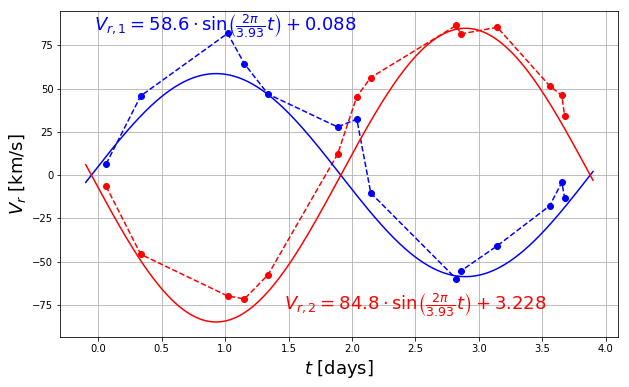

In [127]:
plt.figure(figsize=(10,6))
plt.plot(t, vrad1, 'bo--', label='data')
plt.plot(t, vrad2, 'ro--', label='data')
plt.plot(tdump, vdump1, 'b-', label='hasil fitting')
plt.plot(tdump, vdump2, 'r-', label='hasil fitting')
plt.xlabel(r'$t$ [days]', fontsize=18)
plt.ylabel(r'$V_{r}$ [km/s]', fontsize=18)
#plt.legend(loc='best')
plt.text(1.0, 86, r'$V_{r,1} = 58.6 \cdot \sin{\left( \frac{2\pi}{3.93} t \right) + 0.088}$', 
         horizontalalignment='center', verticalalignment='center', fontsize=18, color='blue')
plt.text(2.5, -75, r'$V_{r,2} = 84.8 \cdot \sin{\left( \frac{2\pi}{3.93} t \right) + 3.228}$', 
        horizontalalignment='center', verticalalignment='center', fontsize=18, color='red')
plt.grid(True)
plt.savefig('vrad.png', transparent=True, dpi=150)

#### kalau misal di gabung saja (dirata-rata) -> diawal sudah membuat asumsi m1 = m2 

In [128]:
dlamb = (np.array(lamb1) - np.array(lamb2))/2.

In [129]:
vrad = dlamb/lamb0 * c.to(u.km/u.s).value

In [130]:
params, params_covariance = optimize.curve_fit(func, t, vrad, p0=[80, 3.5, 0.0]) # p0 = tebakan awal
print(params)

[7.17929799e+01 3.90845415e+00 5.38123541e-02]


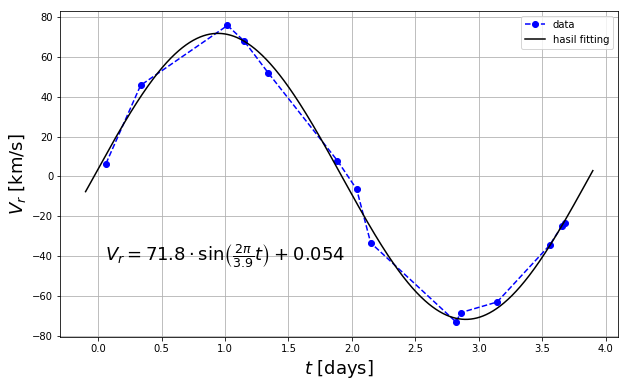

In [131]:
tdump = np.linspace(-0.1, 3.9, 1000)
ydump = func(tdump, params[0], params[1], params[2])

plt.figure(figsize=(10,6))
plt.plot(t, vrad, 'bo--', label='data')
plt.plot(tdump, ydump, 'k-', label='hasil fitting')
plt.xlabel(r'$t$ [days]', fontsize=18)
plt.ylabel(r'$V_{r}$ [km/s]', fontsize=18)
plt.legend()
plt.grid(True)
plt.text(1.0, -40, r'$V_r = 71.8 \cdot \sin{\left( \frac{2\pi}{3.9} t \right) + 0.054}$', 
         horizontalalignment='center', verticalalignment='center', fontsize=18)
plt.savefig('vrad_combine.png', transparent=True, dpi=150)

In [132]:
a = (3.93*24*3600)/(2*np.pi) * (58.6 + 84.8)
print(a, '  km   =   ', (a*u.km).to(u.au), ' sa')

7749533.782548408   km   =    0.05180243372640737 AU  sa


In [133]:
0.0518**3 / (3.93/365.25)**2 

1.2005620958717438

In [134]:
84.8/58.6

1.447098976109215

In [135]:
M2 = 1.2/2.447
M1 = 1.2 - M2
print(M1, M2)

0.7096035962402942 0.4903964037597057


### Nomor 20

In [136]:
t1 = 3600.0 * u.second
M = 2.16e30 * u.kg
r1 = 10 * u.km
r2 = 20 * u.km

In [137]:
rs = (2*G*M) / c**2 # Schwarzchild radius

In [138]:
print(rs)

3207.995489997936 m


In [139]:
t0 = t1 / (np.sqrt( 1.0 - rs/r1))

In [140]:
t0

<Quantity 4368.21009276 s>

In [141]:
t0.to(u.minute)

<Quantity 72.80350155 min>

In [142]:
t2 = t0 * (np.sqrt( 1.0 - rs/r2))

In [143]:
t2

<Quantity 4002.57788272 s>

In [144]:
t2.to(u.minute)

<Quantity 66.70963138 min>

In [145]:
t1/t2

<Quantity 0.89942035>

In [146]:
np.sqrt(2.0) * np.sqrt( (10000*u.m - rs)/(20000*u.m - rs) )

<Quantity 0.89942035>

#### Proper distance in Schwarzschild' space

In [147]:
def gamma(r, rs):
    return np.sqrt(1.0 - rs/r)

# solution from Wolfram alpha ;D
def ___proper_distance_radial(r, rs):
    return r*gamma(r, rs) + 0.5*rs*np.log( 2.*r*(gamma(r, rs) + 1) - rs )
    #return rs*np.log(r - rs) + r # null geodetic

def proper_distance_radial(r1, r2, rs):
    return ___proper_distance_radial(r2, rs) - ___proper_distance_radial(r1, rs)

In [148]:
rs = rs.value
print(rs)

3207.995489997936


In [149]:
proper_distance_radial(10000, 20000, rs)

11354.501148161464

In [150]:
proper_distance_radial(10000, 30000, rs)

22077.320348093497

In [151]:
proper_distance_radial(30000, 10000, rs)

-22077.320348093497

In [152]:
proper_distance_radial(rs, 20000, rs)

23347.85738756382

In [153]:
## flattttteeer at the far distance
proper_distance_radial(1000000000, 1000020000, 3207.995489997936)

20000.032079696655